### 在运行本文件前，需要先运行Logistics_Regression文件中产生训练集和测试集的函数 generate_train_test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from utils import sigmoid, get_batch, normalization

In [24]:
# relu激活函数
def relu(z):
    a = np.maximum(0,z)
    return a

In [31]:
# 前向传播
def propogate(w,b,x):
    '''
    只有一层隐藏层神经网络的前向传播
    @param：
        w:权值列表
        b:偏置列表
    @return:
        返回最后的网络输出
    '''
    a = x
    z = np.dot(w[0],a) + b[0]
    a = relu(z)
    z = np.dot(w[1],a) + b[1]
    a = sigmoid(z) 
    return a

In [26]:
# 计算正确率
def test(w,b,x,y):
    a = propogate(w,b,x)
    predict = np.where(a > 0.5, 1., 0.)
    accury = 1 - np.mean(np.abs(predict - y))
    return accury

In [29]:

X = np.load('data/train_x.npy')
Y = np.load('data/train_y.npy')

Xt = np.load('data/test_x.npy')
Yt = np.load('data/test_y.npy')
print('the shape of X is', X.shape)
print('the shape of Y is', Y.shape)

the shape of X is (510, 48896)
the shape of Y is (1, 48896)


Training on 500 batch,train set accuty is 0.812, loss is 0.428. Test Accury is 0.792
Training on 1000 batch,train set accuty is 0.805, loss is 0.380. Test Accury is 0.818
Training on 1500 batch,train set accuty is 0.844, loss is 0.356. Test Accury is 0.838
Training on 2000 batch,train set accuty is 0.852, loss is 0.319. Test Accury is 0.849
Training on 2500 batch,train set accuty is 0.836, loss is 0.366. Test Accury is 0.856
Training on 3000 batch,train set accuty is 0.859, loss is 0.350. Test Accury is 0.842
Training on 3500 batch,train set accuty is 0.844, loss is 0.316. Test Accury is 0.850
Training on 4000 batch,train set accuty is 0.828, loss is 0.338. Test Accury is 0.849
Training on 4500 batch,train set accuty is 0.852, loss is 0.312. Test Accury is 0.846
Training on 5000 batch,train set accuty is 0.836, loss is 0.336. Test Accury is 0.852
Training on 5500 batch,train set accuty is 0.883, loss is 0.285. Test Accury is 0.861
Training on 6000 batch,train set accuty is 0.859, loss 

Training on 48000 batch,train set accuty is 0.867, loss is 0.273. Test Accury is 0.867
Training on 48500 batch,train set accuty is 0.844, loss is 0.287. Test Accury is 0.860
Training on 49000 batch,train set accuty is 0.898, loss is 0.275. Test Accury is 0.864
Training on 49500 batch,train set accuty is 0.875, loss is 0.307. Test Accury is 0.862
Training on 50000 batch,train set accuty is 0.906, loss is 0.246. Test Accury is 0.864
Training on 50500 batch,train set accuty is 0.844, loss is 0.310. Test Accury is 0.858
Training on 51000 batch,train set accuty is 0.867, loss is 0.335. Test Accury is 0.866
Training on 51500 batch,train set accuty is 0.859, loss is 0.268. Test Accury is 0.858
Training on 52000 batch,train set accuty is 0.875, loss is 0.318. Test Accury is 0.862
Training on 52500 batch,train set accuty is 0.844, loss is 0.304. Test Accury is 0.865
Training on 53000 batch,train set accuty is 0.891, loss is 0.321. Test Accury is 0.867
Training on 53500 batch,train set accuty is

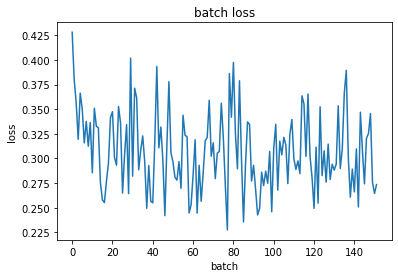

In [61]:
# 放置log下溢，所以加一个很小的量
epsilon = 1e-9
# 迭代次数
TRAIN_STEP = 200
# 学习速率 learning rate
lr = 0.6
alpha = lr
# batch的大小
BATCH_SIZE = 128
# 学习速率衰减系数
LEARNING_RATE_DECAY = 0.25
# 指数加权系数
BETA = 0.9

# 输入结点个数
INPUT_NODE = 510
# 输出结点个数
OUTPUT_NODE = 1
# 隐藏层结点个数
HIDDEN_LAYER = 300


w1 = np.random.randn(HIDDEN_LAYER, INPUT_NODE)
b1 = np.zeros(shape=[HIDDEN_LAYER, 1])

w2 = np.random.randn(OUTPUT_NODE, HIDDEN_LAYER)
b2 = np.zeros(shape=[OUTPUT_NODE, 1])

# Momentum优化法中的影子变量
v_dw1 = np.zeros(shape=[HIDDEN_LAYER, INPUT_NODE])
v_db1 = np.zeros(shape=[HIDDEN_LAYER, 1])
v_dw2 = np.zeros(shape=[OUTPUT_NODE, HIDDEN_LAYER])
v_db2 = np.zeros(shape=[OUTPUT_NODE, 1])


losses = []
k = 1
for epoch in range(TRAIN_STEP):
    # 每过一个世代学习速率衰减一次
    lr = alpha / (1 + LEARNING_RATE_DECAY * epoch)
    index = 0
    while True:
        x, y, index = get_batch(index, BATCH_SIZE, X, Y)
        if x is None:
            break
        
        m = y.shape[1]
        
        z1 = np.dot(w1, x) + b1
        a1 = relu(z1)
        
        z2 = np.dot(w2, a1) + b2
        a = sigmoid(z2)
        
        cross_entropy = (1 - y) * np.log(1 - a + epsilon) + y * np.log(a + epsilon)
        loss = - np.mean(cross_entropy)
        
        # 反向传播
        dz2 = a - y
        dw2 = np.dot(dz2, a1.T) / m
        db2 = np.mean(dz2, axis=1, keepdims=True)
        
        da1 = np.dot(w2.T, dz2)
        dz1 = np.array(da1, copy=True)
        dz1[z1 <= 0] = 0
        dw1 = np.dot(dz1, x.T) / m
        db1 = np.mean(dz1, axis=1, keepdims=True)
        
        v_dw1 = BETA * v_dw1 + (1 - BETA) * dw1
        v_db1 = BETA * v_db1 + (1 - BETA) * db1
        v_dw2 = BETA * v_dw2 + (1 - BETA) * dw2
        v_db2 = BETA * v_db2 + (1 - BETA) * db2
        
        # 更新参数
        w2 -= lr * v_dw2
        b2 -= lr * v_db2
        w1 -= lr * v_dw1
        b1 -= lr * v_db1
        
        # 每隔500个batch测试一次正确率
        if k % 500 == 0:
            losses.append(loss)
            w = [w1,w2]
            b = [b1,b2]
            accury = test(w,b,Xt,Yt)
            train_acc = test(w,b,x,y)
            print('Training on %d batch,train set accuty is %.3f, loss is %.3f. Test Accury is %.3f'\ 
                  %(k,train_acc, loss, accury))
        k += 1
        
    
# 画出每500batch的损失（loss）值
plt.figure()
plt.plot(losses)
plt.title('batch loss')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()
        



In [62]:
# 加载测试集
path_test ='data/X_test'
dft = pd.read_csv(path_test, dtype=np.float32)
Xtest = dft.iloc[:, 1:].values
Xtest = Xtest.T
dft = None
Xtest = normalization(Xtest)

In [63]:
# 使用训练模型预测数据
weight = [w1,w2]
bias = [b1,b2]
a = propogate(weight, bias, Xtest)
predict = np.where(a < 0.5, 0, 1)
# print('prediction shape is ', predict.shape)

prediction shape is  (1, 27622)


In [64]:
result = pd.DataFrame(predict.T, columns=['label'])
path_result = 'data/result_one_layer_{}_{}.csv'.format(HIDDEN_LAYER,lr)
result.to_csv(path_result)
print('learning rate is:%g' %lr)